<a href="https://colab.research.google.com/github/rameshavinash94/CMPE-258_Assignment1/blob/main/PART_C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Linear Regression**

Regression is a method of modelling a target value based on independent predictors. 
This method is mostly used for **forecasting and finding out cause and effect relationship between variables**. Regression techniques mostly differ based on the number of independent variables and the type of relationship between the independent and dependent variables.

<div>
<img src='https://miro.medium.com/max/1400/0*szXvH1a4ZQytyqhg.png' width='400'>
</div>

*The red line in the above graph is referred to as the best fit straight line. Based on the given data points, we try to plot a line that models the points the best. The line can be modelled based on the linear equation shown below.*



A linear regression line has an equation of the form 

**`Y = mX + c`**

where X is the explanatory/independent variable and Y is the dependent variable. The slope of the line is m, and c is the intercept (the value of y when x = 0).


***In case of Housing price prediction:***
<div>
<img src="https://drive.google.com/uc?id=1rwftJLQ2J764Vyp8cRTYlkBlLN3dPnFG" width="250")>
</div>


**Simple linear regression is used to estimate the relationship between two quantitative variables. You can use simple linear regression when you want to know:**

*How strong the relationship is between two variables (e.g. the relationship between rainfall and soil erosion).*

*The value of the dependent variable at a certain value of the independent variable (e.g. the amount of soil erosion at a certain level of rainfall).*

**Prior moving to Linear regression code/algorithm lets understand few important concepts required for Linear regression.**

**Correlation:** explains the association among variables within the data

<div>
<img src='https://www.mathsisfun.com/data/images/correlation-examples.svg' width='400'>
</div>

**Variance:** the degree of the spread of the data

**Standard deviation:** the square root of the variance

**Normal distribution:** a continuous probability distribution(gaussian distribution), it’s sort of a bell curve in which the right side of the mean is the mirror of the left side

**Cost Function**

Cost function helps to find the best possbile value for m and c, such that we can provide the best fit line for the data points.

Cost function measures how a machine learning model performs.

Cost function is the calculation of the error between predicted values and actual values, represented as a single real number.


**The difference between the cost function and loss function is as follows:**

The cost function is the average error of n-samples in the data (for the whole training data) and the loss function is the error for individual data points (for one training example).


**Gradient Descent**

 the word **gradient** means an **increase and decrease in a property or something**! whereas **Descent** means **the act of moving downward**

Gradient descent is an iterative optimization algorithm to find the minimum of a function. Here that function is our Loss Function.

Gradient descent is a method of updating m and c to reduce the cost function(MSE).

The concept is that we start with some m and c values and then reduce the cost by changing them iteratively. Gradient descent assists us in changing the values.

<div>
<img src='https://miro.medium.com/proxy/0*QwE8M4MupSdqA3M4.png' width='400'>
</div>


**Usual example in Gradiant descent:**

Imagine a valley and a person with no sense of direction who wants to get to the bottom of the valley. He goes down the slope and takes large steps when the slope is steep and small steps when the slope is less steep. He decides his next position based on his current position and stops when he gets to the bottom of the valley which was his goal.

<div>
<img src='https://editor.analyticsvidhya.com/uploads/93873gd1.png' width='400'>
</div>



**Why?**

*   Gradient descent is by far the most popular optimization strategy used in Machine Learning and Deep Learning at the moment.

*   It is used when training Data models, can be combined with every algorithm and is easy to understand and implement.

**Gradient Descent from Scratch**

In [16]:
from matplotlib import pyplot as plt
import math,random
import numpy as np

In [2]:
def loss_function(data,theta):
    #get m and b
    m = theta[0]
    b = theta[1]
    loss = 0
    #on each data point
    for i in range(0, len(data)):
        #get x and y
        x = data[i, 0]
        y = data[i, 1]
        #predict the value of y
        y_hat = (m*x + b)
        #compute loss as given in quation (2)
        loss = loss + ((y - (y_hat)) ** 2)
    #mean sqaured loss
    mean_squared_loss = loss / float(len(data))
    return mean_squared_loss

In [3]:
def compute_gradients(data, theta):
    gradients = np.zeros(2)
    #total number of data points
    N = float(len(data))
    m = theta[0]
    b = theta[1]
    #for each data point
    for i in range(len(data)):
        x = data[i, 0]
        y = data[i, 1]
        #gradient of loss function with respect to m as given in (3)
        gradients[0] += - (2 / N) * x * (y - (( m* x) + b))
        #gradient of loss funcction with respect to b as given in (4)
        gradients[1] += - (2 / N) * (y - ((theta[0] * x) + b))
    #add epsilon to avoid division by zero error
    epsilon = 1e-6 
    gradients = np.divide(gradients, N + epsilon)
    return gradients

In [5]:
data = np.random.randn(500, 2) ## Column one=X values; Column two=Y values
theta = np.zeros(2) ## Model Parameters(Weights)
theta = np.zeros(2)
gr_loss=[]
for t in range(50000):
    #compute gradients
    gradients = compute_gradients(data, theta)
    #update parameter
    theta = theta - (1e-2*gradients)
    #store the loss
    gr_loss.append(loss_function(data,theta))

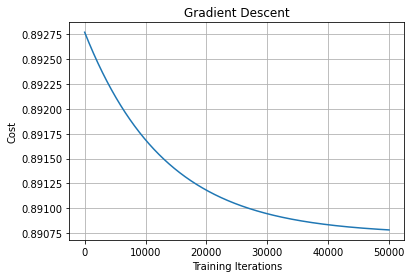

In [11]:
plt.plot(gr_loss)
plt.grid()
plt.xlabel('Training Iterations')
plt.ylabel('Cost')
plt.title('Gradient Descent')
plt.show()

**MINIBATCH**

In [9]:
def minibatch(data, theta, lr = 1e-2, minibatch_ratio = 0.01, num_iterations = 5000):
    
    loss = []
    minibatch_size = int(math.ceil(len(data) * minibatch_ratio))
    
    for t in range(num_iterations):
        sample_size = random.sample(range(len(data)), minibatch_size)
        np.random.shuffle(data)
        
        #sample batch of data
        sample_data = data[0:sample_size[0], :]
        
        #compute gradients
        grad = compute_gradients(sample_data, theta)
       
        #update parameters
        theta = theta - (lr * grad)
        
        loss.append(loss_function(data,theta))
            
    return loss

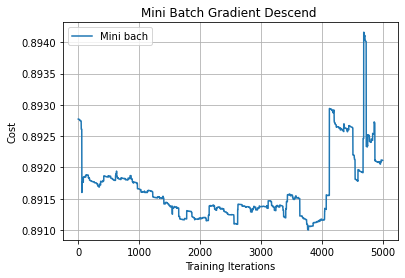

In [14]:
theta = np.zeros(2)
mini_loss = minibatch(data, theta)
# plt.plot(gr_loss,label='Gradient Descend')
plt.plot(mini_loss,label='Mini bach')
plt.grid()
plt.xlabel('Training Iterations')
plt.ylabel('Cost')
plt.legend()
plt.title('Mini Batch Gradient Descend ')
plt.show()

**Stochastic Gradient Descent (SGD)**

In [37]:
def SGD(data, theta, lr = 1e-2, num_iterations = 5000):
    
    loss = []
    
    for t in range(num_iterations):
        np.random.shuffle(data)
                
        #sample batch of data
        random_indices = np.random.choice(5,size=1)
        random_rows = data[random_indices, :]
        
        #compute gradients
        grad = compute_gradients(random_rows, theta)
       
        #update parameters
        theta = theta - (lr * grad)
        
        loss.append(loss_function(data,theta))
            
    return loss

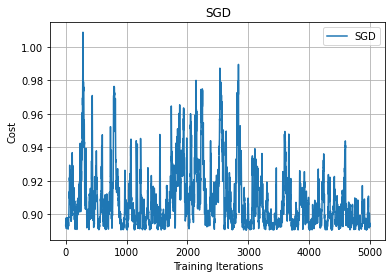

In [38]:
theta = np.zeros(2)
SGD = SGD(data, theta)
# plt.plot(gr_loss,label='Gradient Descend')
plt.plot(SGD,label='SGD')
plt.grid()
plt.xlabel('Training Iterations')
plt.ylabel('Cost')
plt.legend()
plt.title('SGD')
plt.show()